In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



In [17]:
model = tf.keras.models.load_model(r"C:\Users\gokul\Face Emotion Recognition\artifacts\face_emotion_model.h5")

In [18]:
train_dir = r"C:\Users\gokul\Face Emotion Recognition\data\test"

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,     # ✅ safe batch size
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    color_mode="grayscale",
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)


Found 5746 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [20]:
val_generator = val_gen

In [21]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)

c:\Users\gokul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step


In [22]:
print("\nClassification Report:\n")
print(classification_report(val_generator.classes, y_pred, target_names=list(val_generator.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

       angry       0.50      0.44      0.47       191
     disgust       0.18      0.82      0.29        22
        fear       0.35      0.17      0.23       204
       happy       0.85      0.81      0.83       354
     neutral       0.56      0.61      0.58       246
         sad       0.43      0.48      0.46       249
    surprise       0.65      0.69      0.67       166

    accuracy                           0.56      1432
   macro avg       0.50      0.58      0.50      1432
weighted avg       0.58      0.56      0.56      1432



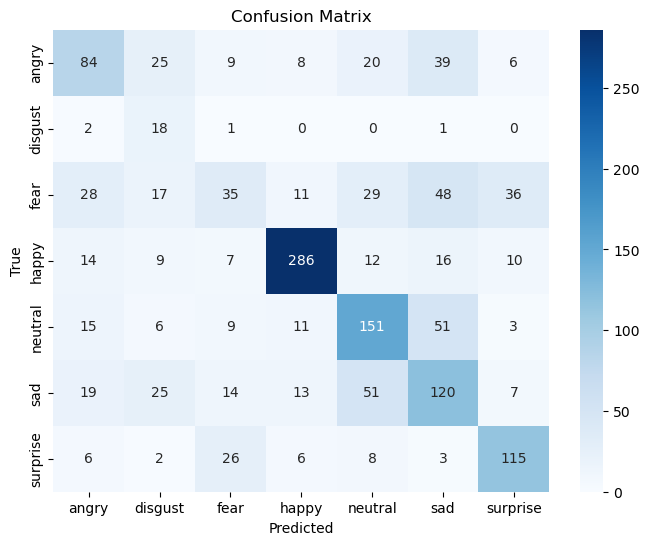

In [23]:
cm = confusion_matrix(val_generator.classes, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [24]:
loss, acc = model.evaluate(val_generator, verbose=0)
print(f"\n✅ Model Accuracy on Validation Set: {acc*100:.2f}%")


✅ Model Accuracy on Validation Set: 55.66%
